# Understanding Descriptive Statistics

Import the necessary libraries here:

In [27]:
# Libraries
import random
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [4]:
# your code here
dice_results = pd.DataFrame(random.choices(range(1,7), k = 10))
dice_results.columns = ['dice_results']
dice_results

,dice_results
0,4
1,5
2,4
3,3
4,3
5,1
6,4
7,1
8,2
9,6


#### 2.- Plot the results sorted by value.

<AxesSubplot:ylabel='dice_results'>

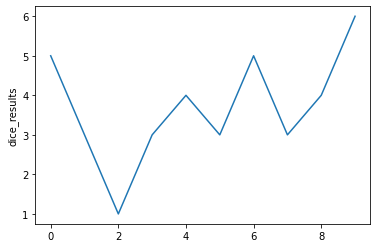

In [3]:
# your code here
sns.lineplot(data=dice_results["dice_results"].T)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

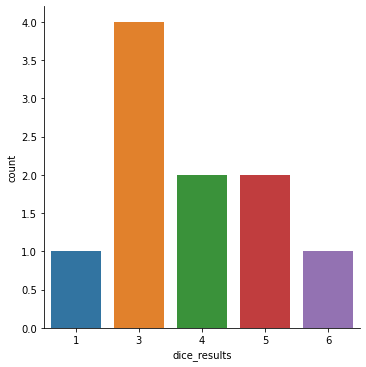

In [4]:
# your code here
sns.catplot(x='dice_results',kind="count", data=dice_results) 

In [ ]:
"""
your comments here
"""
## first we can see the individual results and order.
## second we see a histogram with the aggregation of results by each face of dice. Its easier to have a ideia of the distribution of results.
## Also we could adapt the histogram and agregate results in bins 

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [5]:
# your code here

def mean_calculator_1(results):
    return (results.sum() / len(results))    ## sum the results and divide by number of results

mean_calculator_1(dice_results['dice_results'])

3.3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here

def mean_calculator_2(results):
    fre_dist = dict(results.value_counts()).items()             ## calculate frequency distribution and get the pair of results in a list
    return sum([pair[0]*(pair[1]/10) for pair in fre_dist])     ## calculate with f.dist. the mean

mean_calculator_2(dice_results['dice_results'])

3.3000000000000003

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [7]:
# your code here

def median_calculator(results):
    values_sorted = list(results.sort_values())                                ## create a list with values sorted
    middle_value = len(values_sorted) // 2                                     ## see number of elements
    return ((values_sorted[middle_value] + values_sorted[~middle_value]) / 2)  ## calculate the median

median_calculator(dice_results['dice_results'])

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [8]:
# your code here

def quartiles(results):
    values_sorted = list(results.sort_values())      ## sort the result values
    middle_value = len(values_sorted) // 2           ## see the middle value
    Q1 = median_calculator(results[:middle_value])   ## check q1 by using the values between minimum and middle
    Q2 = median_calculator(results)                  ## check q2 or median
    Q3 = median_calculator(results[middle_value:])   ## check q3 by using the values between middle and maximum
    return ('Q1: %f, Q2: %f, Q3: %f') %(Q1,Q2,Q3)

quartiles(dice_results['dice_results'])

'Q1: 4.000000, Q2: 3.500000, Q3: 2.000000'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [99]:
# your code here
dice_hundred = pd.read_csv("..\\data\\roll_the_dice_hundred.csv",index_col=0)     ## reading the file
dice_hundred

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


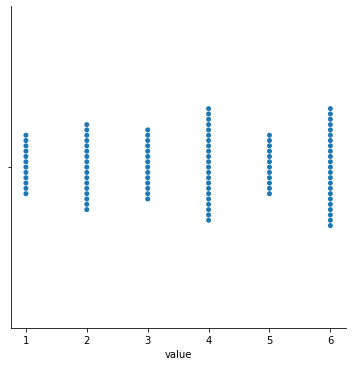

In [117]:
sns.catplot(x='value',kind="swarm", data=dice_hundred)   ## plot as a swarmplot

In [ ]:
"""
your comments here
"""
## 6 have the higher frequency followed by 4
## 5 and 1 have the lower frequency

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [108]:
# your code here

mean_calculator_1(dice_hundred['value'])    ## calculate the mean

3.74

#### 3.- Now, calculate the frequency distribution.


In [109]:
# your code here

dict(dice_hundred['value'].value_counts()).items()   ## see frequency of each value


dict_items([(6, 23), (4, 22), (2, 17), (3, 14), (1, 12), (5, 12)])

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

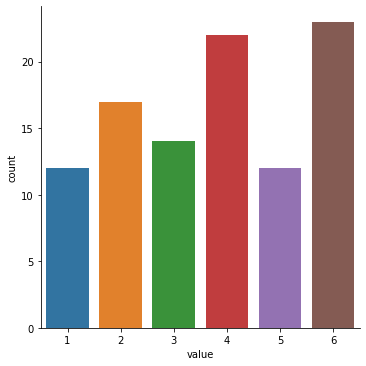

In [110]:
# your code here
sns.catplot(x='value',kind="count", data=dice_hundred)        ## see histogram

In [111]:
"""
your comments here
"""
## 6 have the higher frequency followed by 4
## 5 and 1 have the lower frequency
## slight differences between frequency. Values between 12 and 23

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [118]:
# your code here

dice_thousand = pd.read_csv("..\\data\\roll_the_dice_thousand.csv",index_col=0)     ## reading the file
dice_thousand

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5
...,...,...
995,995,1
996,996,4
997,997,4
998,998,3


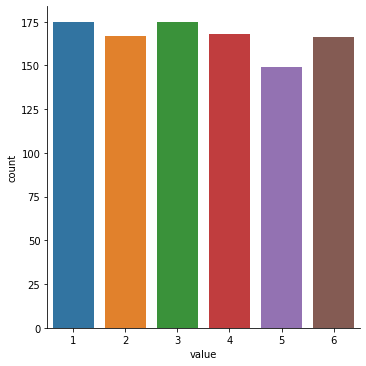

In [120]:
sns.catplot(x='value',kind="count", data=dice_thousand)        ## see histogram

In [121]:
mean_calculator_1(dice_thousand['value'])    ## calculate the mean

3.447

In [122]:
dict(dice_thousand['value'].value_counts()).items()   ## see frequency of each value

dict_items([(1, 175), (3, 175), (4, 168), (2, 167), (6, 166), (5, 149)])

In [ ]:
"""
your comments here
"""

## 1 and 3 have the higher frequency followed by 4
## 5 have the lower frequency
## slight differences between frequency. Values between 149 and 175
## mean is more near to 3,5 meaning the data is more evenly distributed 

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [22]:
# your code here
pop1 = pd.read_csv("..\\data\\ages_population.csv")
pop1

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [129]:
pop1['observation'].value_counts()  ## see frequency of each value

39.0    45
41.0    36
30.0    34
35.0    33
42.0    32
        ..
4.0      1
82.0     1
69.0     1
70.0     1
71.0     1
Name: observation, Length: 72, dtype: int64

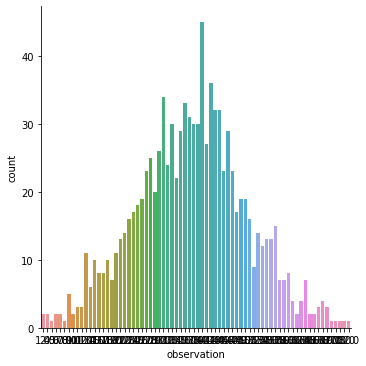

In [131]:
sns.catplot(x='observation',kind="count", data=pop1)        ## see histogram

## mean 37
## std 15

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [132]:
# your code here
mean_calculator(pop1['observation'])

36.56

In [133]:
np.std(pop1['observation'])

12.810089773299795

In [ ]:
"""
your comments here
"""
## results are near my guesses

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [11]:
# your code here
pop2 = pd.read_csv("..\\data\\ages_population2.csv")
pop2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [135]:
pop2['observation'].value_counts()  ## see frequency of each value

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
19.0      3
35.0      3
36.0      2
Name: observation, dtype: int64

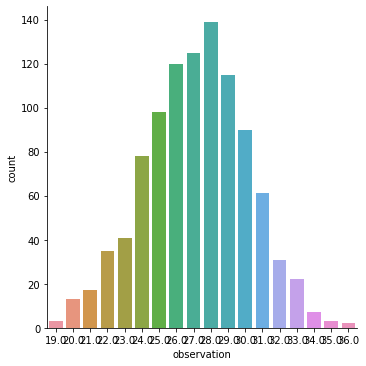

In [136]:
sns.catplot(x='observation',kind="count", data=pop2)        ## see histogram

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""
## results are less disperse
## the most frequent ages have higher frequencies when comparing to step 1

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [12]:
# your code here
mean_calculator_1(pop2['observation'])

27.155

In [13]:
np.std(pop2['observation'])

2.9683286543103677

In [ ]:
"""
your comments here
"""
## values are less disperse
## the mean is lower when comparing to the first data

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [14]:
# your code here
pop3 = pd.read_csv("..\\data\\ages_population3.csv")
pop3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


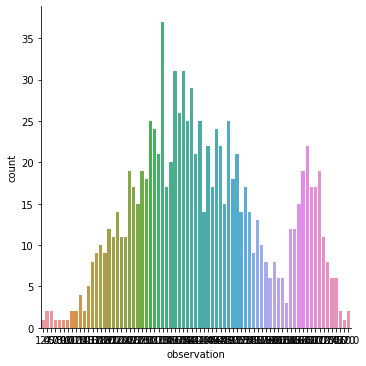

In [19]:
sns.catplot(x='observation',kind="count", data=pop3)        ## see histogram

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [15]:
# your code here
mean_calculator_1(pop3['observation'])

41.989

In [16]:
np.std(pop3['observation'])

16.13663158778808

In [17]:
"""
your comments here
"""
## mean and std is higher than the results from step 1 


'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

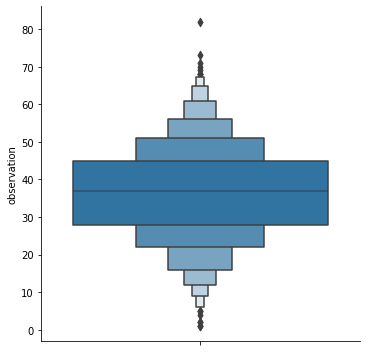

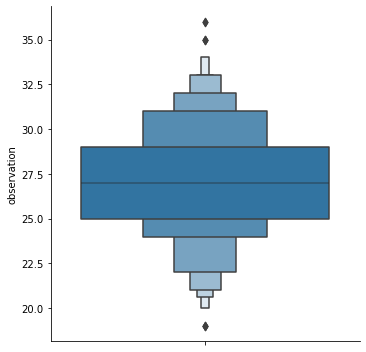

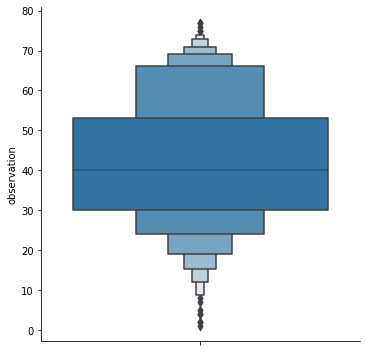

In [29]:
# your code here
sns.catplot(y="observation", kind="boxen",data=pop1)
sns.catplot(y="observation", kind="boxen",data=pop2)
sns.catplot(y="observation", kind="boxen",data=pop3)

In [ ]:
"""
your comments here
"""
## pop3 have bigger interquartile range than pop1 and pop2
## pop2 have the ages less disperse than pop1 and pop3
## pop3 have the ages more disperse than pop1 and pop2
## pop3 is older than pop1 and pop2 (from the histogram is possible to observe second pick of frequency in older ages)

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here
## in box plot is possible already to see other percentiles

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here